These are runs that are in Tas3d/ on haise. They are meant to elucidate the processes that set the linear response on the shelf.  Some of the analysis is from ProcessHaise and some is from AnalyzeTasmaniaSetupsNew, in particular the model forcing.



In [107]:
import cPickle as pickle
import hdf5storage
import pprint
from jmkdata import *
from jmkfigure import *
from ttide import *
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

from scipy.signal import convolve2d

cmap2=getCmap2()

style.use('ggplotjmk')

%matplotlib notebook
%load_ext autoreload
%autoreload 2
from ttide import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# mooring locations as planned for ttide experiment:
import scipy.io as io
moor = io.loadmat('otherdata/moorings_ttide.mat')
mooringlat=moor['moorings']['plan_lat'][0][0][0]
mooringlon=moor['moorings']['plan_lon'][0][0][0]
#plot(mooringlon,mooringlat,'x')
kmpernm = 1.8532
cenlon = 148.
cenlat = -44.
Lat0=cenlat
Lon0=cenlon
xmoor=(mooringlon-cenlon)*cos(cenlat*pi/180)*kmpernm*60.
ymoor=(mooringlat-cenlat)*kmpernm*60.
X = xmoor+1j*ymoor
X = X*exp(1j*12.*np.pi/180.)
xmoor = real(X)
ymoor = imag(X)
print xmoor
print ymoor
#sublabel(array([gca()]))


[ 402.74391144  233.143193    161.99917311  162.00261167   20.75984316
   10.7908164    -0.98460023   17.8960192     4.4318               nan
   17.982        16.2281        3.7719        5.5263       -7.94300874
    4.0909        3.69182337]
[  28.76781334  192.71979006  198.00252093  264.11726892  308.92816531
  300.73887976  300.00928478  109.65909637  115.426                nan
  305.877       309.386       300.9649      296.9298      296.00662007
  116.9034      118.39400961]


In [3]:
def plotMoor(ax):
    ax.plot(xmoor,ymoor,'d',mfc=[0,1.,0.],mec='none',markersize=10)

In [4]:
# get the bathy
tidecyc=20
#with open('Tas3d/Real1km03/Diags%04d.pickle'%(tidecyc*360),'rb') as f:
#    D=pickle.load(f)
D=hdf5storage.loadmat('Tas3d/Real1km03/Diags%04d.mat'%(tidecyc*360))

print D.keys()
topo=dict()
topo['x']=D['x']/1.e3
topo['y']=D['y']/1.e3
topo['H'] = D['Depth']
# get lat and lon:
X,Y = np.meshgrid(topo['x'],topo['y'])
XX = (X+1j*Y)*np.exp(-12.*np.pi/180.)
X=np.real(XX);Y=np.imag(XX)
Lon,Lat=modxy2lonlat(X,Y)
topo['Lon']=Lon
topo['Lat']=Lat


['vEbc', 'uEbc', 'vPbc', 'Conv', 'Ebc', 'uPbc', 'vPbt', 'Ebc0', 'Depth', 'U', 'y', 'x', 'z', 'uPbt']


[u'#refs#', u'MODELo', u'README']
[u'APE', u'Clin', u'DZ', u'Fu', u'Fv', u'H', u'KE', u'N2', u'X', u'Y', u'Z', u'ampd', u'ampr', u'ampu', u'ampubt', u'ampv', u'ampvbt', u'dmodes', u'idxs', u'jdxs', u'lat0', u'lat1', u'lon0', u'lon1', u'omega', u'phad', u'phar', u'phau', u'phaubt', u'phav', u'phavbt', u'pmodes', u'rmodes', u't0', u't1', u'time']
[[ 12.42060144]
 [ 12.00000036]
 [ 25.81934325]
 [ 23.93446583]]
(250, 190, 5, 4)
(190,)
(250, 190)


<IPython.core.display.Javascript object>


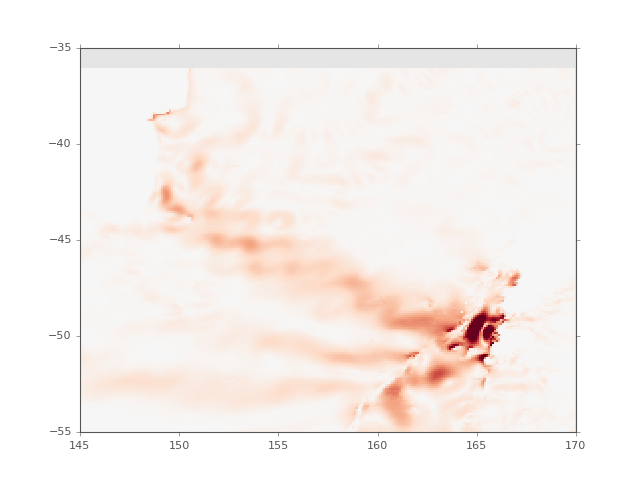

In [5]:
import scipy.io as sio
import h5py
dat = h5py.File('otherdata/OUTER_TIDE_0.025x0.025_M2_S2_K1_O1_01.01.2015_hvisc10_F_C_subset_145_170_-55_-36_sub_4.mat')
print dat.keys()

MODELo=dat['MODELo']
print MODELo.keys()
print 1./MODELo['omega'][:]
#print MODELo['dmodes'][:]
print shape(MODELo['Fv'])
Fv = MODELo['Fv'][:,:,0,0]
Fu = MODELo['Fu'][:,:,0,0]

lon = MODELo['X'][:][0]
lat = MODELo['Y'][:][0]
#print lon
#print lat
print shape(lat)
print shape(Fu)
figure()
pcolormesh(lon,lat,np.abs(Fu.T+1j*Fv.T)/1000,cmap=cmap2)
clim([0,20])



## Plot cartoons of issues with moorings

<IPython.core.display.Javascript object>


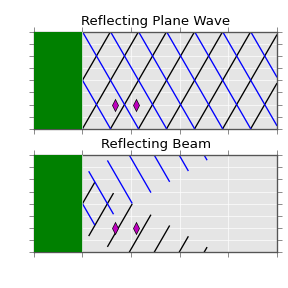

In [265]:
fig,axs = plt.subplots(2,1,figsize=(3,3))

ax=axs[0]
# draw a wall
ax.fill_between([-500,0],[-1000,-1000],[2000,2000],facecolor='g',zorder=1000)
ang=30.*np.pi/180.
lambd=100.

crest = np.arange(-1000,1000,1)

for i in np.arange(-60,60):
    cr = ((1j*crest)+(i*lambd))*np.exp(-1j*ang)
    ax.plot(np.real(cr),np.imag(cr),'k')
for i in np.arange(-60,60):
    cr = ((1j*crest)+(i*lambd))*np.exp(-1j*((np.pi-ang)))
    ax.plot(np.real(cr),np.imag(cr),'b')
ax.set_aspect(1.)
ax.set_xlim([-200.,800.])
ax.set_ylim([-200.,200.])
ax.plot(220,-100.,'md')
ax.plot(135,-100.,'md')
ax.set_title('Reflecting Plane Wave',fontsize=10)


ax=axs[1]
# draw a wall
ax.fill_between([-500,0],[-1000,-1000],[2000,2000],facecolor='g',zorder=1000)
ang=30.*np.pi/180.
lambd=178./2.

crest = np.arange(-100,100,1)

for i in np.arange(-40,40):
    cr = ((1j*crest)+(i*lambd))*np.exp(-1j*ang)
    ax.plot(np.real(cr),np.imag(cr),'k')
for i in np.arange(-40,40):
    cr = ((1j*crest)+(i*lambd))*np.exp(-1j*((np.pi-ang)))
    ax.plot(np.real(cr),np.imag(cr),'b')
ax.set_aspect(1.)
ax.set_xlim([-200.,800.])
ax.set_ylim([-200.,200.])
ax.plot(220,-100.,'md')
ax.plot(135,-100.,'md')
ax.set_title('Reflecting Beam',fontsize=10)

for ax in axs:
    ax.set_xticklabels('')
    ax.set_yticklabels('')
if 1:
    jmkprint('ReflectingSketch','PaperPlots.ipynb')
    

## Plot harper's Model and bathy

[u'#refs#', u'MODELo', u'README']
[u'APE', u'Clin', u'DZ', u'Fu', u'Fv', u'H', u'KE', u'N2', u'X', u'Y', u'Z', u'ampd', u'ampr', u'ampu', u'ampubt', u'ampv', u'ampvbt', u'dmodes', u'idxs', u'jdxs', u'lat0', u'lat1', u'lon0', u'lon1', u'omega', u'phad', u'phar', u'phau', u'phaubt', u'phav', u'phavbt', u'pmodes', u'rmodes', u't0', u't1', u'time']
[[ 12.42060144]
 [ 12.00000036]
 [ 25.81934325]
 [ 23.93446583]]
(250, 190, 5, 4)
(190,)
(250, 190)


<IPython.core.display.Javascript object>


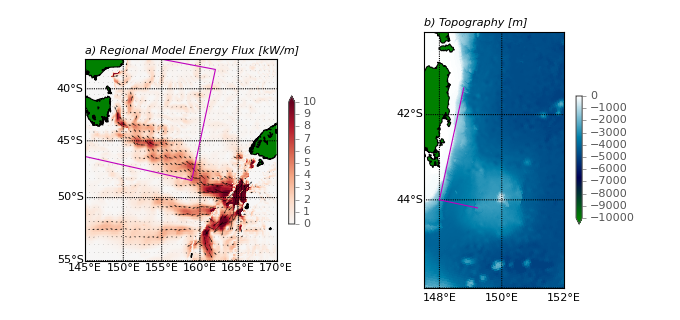

(250,) (190,) (190, 250) (190, 250)
-54.9875
[ 148.          149.22291638  149.22292861] [-44.         -44.1869844  -44.18698627]


In [38]:
import scipy.io as sio
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import h5py
dat = h5py.File('otherdata/OUTER_TIDE_0.025x0.025_M2_S2_K1_O1_01.01.2015_hvisc10_F_C_subset_145_170_-55_-36_sub_4.mat')
print dat.keys()

MODELo=dat['MODELo']
print MODELo.keys()
print 1./MODELo['omega'][:]
#print MODELo['dmodes'][:]
print shape(MODELo['Fv'])
Fv = MODELo['Fv'][:,:,0,0]
Fu = MODELo['Fu'][:,:,0,0]

lon = MODELo['X'][:][0]
lat = MODELo['Y'][:][0]
#print lon
#print lat

print shape(lat)
print shape(Fu)

fig=figure(figsize=(8.5,4))
gs = gridspec.GridSpec(1,2)

subplot(gs[0])
x=lon.flatten()
y = lat.flatten()
pu = Fu.T/1000.
pv=Fv.T/1000.


print shape(x),shape(y),shape(pu),shape(pv)
if 0:
    m = Basemap(projection='merc',llcrnrlat=-55,urcrnrlat=-37,\
                llcrnrlon=145,urcrnrlon=170,resolution='i')
    pickle.dump(m,open('otherdata/map.pickle','wb'),-1)
m=pickle.load(open('otherdata/map.pickle','rb'))
X,Y=meshgrid(x,y)
print np.min(Y)
pcm=m.pcolormesh(X,Y,np.abs(pu+1j*pv),latlon=True,cmap=cmap2,rasterized=True)
colorbar(pcm,shrink=0.5,extend='max')
clim(np.array([0.,1.])*10.)
dec=6
m.quiver(X[::dec,::dec],Y[::dec,::dec],pu[::dec,::dec],
           pv[::dec,::dec],scale=200.,latlon=True)
m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents(color='green',lake_color='aqua')
parallels = np.arange(-55.,-30,5.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(0.,180.,5.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
x=np.array([np.min(topo['x']),np.min(topo['x']),np.max(topo['x']),np.max(topo['x']),np.min(topo['x'])])
y=np.array([np.min(topo['y']),np.max(topo['y']),np.max(topo['y']),np.min(topo['y']),np.min(topo['y'])])
llon,llat=modxy2lonlat(x,y)
m.plot(llon,llat,'m',latlon=True)
title('a) Regional Model Energy Flux [kW/m]',loc='left',fontsize=10,fontstyle='italic')


subplot(gs[1:])
if 0:
    m = Basemap(projection='merc',llcrnrlat=-46,urcrnrlat=-40,\
                llcrnrlon=145+2.5,urcrnrlon=152,resolution='i')
    pickle.dump(m,open('otherdata/mapzoom.pickle','wb'),-1)
m=pickle.load(open('otherdata/mapzoom.pickle','rb'))

#m.pcolormesh(Lons,Lats,topoin,rasterized=True,latlon=True,cmap=cm.ocean,vmin=-8000,vmax=0.)
pcm=m.pcolormesh(topo['Lon'],topo['Lat'],-topo['H'],rasterized=True,latlon=True,cmap=cm.ocean,vmin=-10000,vmax=0.)
colorbar(pcm,shrink=0.5,extend='min')

#m.contour(X,Y,np.abs(dat['efx']+1j*dat['efy'])/1000.,np.arange(5,50,10.),linewidths=2.,latlon=True,
#          cmap=cmap2,alpha=0.7,vmin=0.,vmax=20.)

m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents(color='green',lake_color='aqua')
parallels = np.arange(-50.,-30,2.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(0.,180.,2.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
x=np.array([np.min(topo['x']),np.min(topo['x']),np.max(topo['x']),np.max(topo['x']),np.min(topo['x'])])
y=np.array([np.min(topo['y']),np.max(topo['y']),np.max(topo['y']),np.min(topo['y']),np.min(topo['y'])])
llon,llat=modxy2lonlat(x,y)
m.plot(llon,llat,'m',latlon=True)
llon,llat=modxy2lonlat(np.array([0,100,100.001]),np.array([0,0,0.]))
print llon,llat
m.plot(llon,llat,'m',latlon=True)
llon,llat=modxy2lonlat(np.array([0,0,0.001]),np.array([0,0,300.]))
m.plot(llon,llat,'m',latlon=True)
title('b) Topography [m]',loc='left',fontsize=10,fontstyle='italic')

plt.show()
if 1:
    jmkprint('LocMap','PaperPlots.ipynb')
    

## Setting Figure 2:

<IPython.core.display.Javascript object>


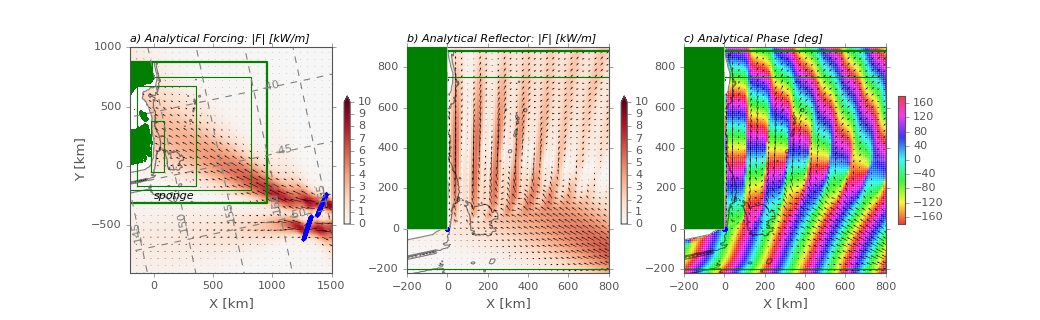

In [21]:
%matplotlib notebook
from jmkfigure import *
import numpy as np
fig,axs=subplots(1,3,figsize=(13,4))
print axs
fig.subplots_adjust(wspace=0.1)
Lat0=-44.
Lon0=148

# center of source:
lat0 = array([-49.5, -47.0,-51.])
lon0 = array([164.5, 165.05,162.5])
# angle source is pointing
ang0 = array([55.,85.,60.])
#length of source
a0=array([200.,200.,200.])*1.e3
zz0=array([1.,0.,1.])*20./1.4
phis = array([0.,0.,0.])

ang0 = ang0*pi/180.

# Now make x0,y0 arrays...

td =[[0],[2],[0,2]]
indd=0
name=['source1','source2','Both']

tit=['a) Analytical Forcing: |F| [kW/m]','b) Analytical Reflector: |F| [kW/m]','c) Analytical Phase [deg]']
tdo = td[2]
for pn in [0,1,2]:
    
    x0=array([])
    y0=array([])
    z0=array([])
    phi0=array([])

    # main source:
    for ii in tdo:
        xx = arange(-a0[ii]/2,a0[ii]/2,a0[ii]/100.)
        xx=xx+1j*0*xx
        xx = xx*exp(1j*ang0[ii])
        x0 = concatenate((x0,real(xx)+(lon0[ii]-Lon0)*60.*1.85e3*cos(Lat0*pi/180)))
        y0= concatenate((y0,imag(xx)+(lat0[ii]-Lat0)*60.*1.85*1e3))
        z0=concatenate((z0,real(xx)*0+zz0[ii]))
        phi0=concatenate((phi0,real(xx)*0+phis[ii]))
       
        
    r0=x0*0.+1.

    ########################
    # map response onto a grid.
    x = arange(-200.,1620.,10.)*1e3
    y = arange(-1320.,1500.,10.)*1e3
    X,Y=meshgrid(x,y)
    u=0.*X
    v=0.*Y
    zz=0.*Y
    kr = 2*pi/178.e3
    om = 2.*pi/12.4/3600.
    f = -1.e-4
    for ii in range(0,shape(x0)[0]):
        xx = x0[ii]+1j*y0[ii]
        xx=xx*exp(12*pi/180*1j)
        # polar distance from the source of all points in the grid.
        r = sqrt((X-real(xx))**2 + (Y-imag(xx))**2)
        theta=arctan2(Y-imag(xx),X-real(xx))
        z = z0[ii]*sqrt(r0[ii]/r)*exp(1j*kr*(r))*exp(1j*phi0[ii])
        k = kr*cos(theta)
        l = kr*sin(theta)
        u = u+(k*om+1j*l*f)/(om**2-f**2)*z
        v = v+(l*om-1j*k*f)/(om**2-f**2)*z
        zz=zz+z
        # do the image for y>0, x>0
        if pn>0:
            xx = x0[ii]+1j*y0[ii]
            xx=xx*exp(12*pi/180*1j)
            xx=-np.real(xx)+np.imag(xx)*1j
            r = sqrt((X-real(xx))**2 + (Y-imag(xx))**2)
            theta=arctan2(Y-imag(xx),X-real(xx))
            z=0.*theta
            z=(z0[ii]*sqrt(r0[ii]/r)*exp(1j*kr*(r))*exp(1j*(phi0[ii]+np.pi)))
            k = kr*cos(theta)
            l = kr*sin(theta)
            thet0 = arctan2(-imag(xx),-real(xx))
            
            z[theta<thet0]=0.
            #u[y>=0,:][:,x>=0] = u[y>=0,:][:,x>=0] +((k*om+1j*l*f)/(om**2-f**2)*z)[y>=0,:][:,x>=0]
            #v[y>=0,:][:,x>=0] =v[y>=0,:][:,x>=0]+((l*om-1j*k*f)/(om**2-f**2)*z)[y>=0,:][:,x>=0]
            #zz[y>=0,:][:,x>=0]=zz[y>=0,:][:,x>=0]+(z)[y>=0,:][:,x>=0] 
            u = u+(k*om+1j*l*f)/(om**2-f**2)*z
            v = v+(l*om-1j*k*f)/(om**2-f**2)*z
            zz=zz+z
    pu = (real(u)*real(zz)+imag(u)*imag(zz))
    pv=(real(v)*real(zz)+imag(v)*imag(zz))

    ### Plot
    subplot(axs[pn])
    if pn<2:
        pcolormesh(x/1e3,y/1e3,abs(pu)+abs(pv),cmap=cmap2,rasterized=True)
        clim(array([-0.,1.])*10.)    
        colorbar(shrink=0.5,extend='max')
    
    else:
        ang = np.angle(zz)*180./np.pi
        pcolormesh(x/1e3,y/1e3,ang,cmap=cm.hsv ,alpha=0.5,rasterized=True)
        clim([-180.,180.])
        colorbar(shrink=0.5)
    dec=3
    if pn==0:
        dec=6
    gca().set_aspect(1.)
    quiver(x[::dec]/1e3,y[::dec]/1e3,pu[::dec,::dec],
           pv[::dec,::dec],scale=100.)
    if pn>0:
        fill_between([-500,0],[0,0],[2000,2000],facecolor='g',zorder=1000)
    # Indicate North...
    
    xx = x0+1j*y0
    xx=xx*exp(12*pi/180*1j)
    
    plot(real(xx)/1e3,imag(xx)/1e3,'b.')
    
    #title(name[indd-1])
    xlabel('X [km]')
    if pn==0:
        ylabel('Y [km]')
    
    # contour our topo over this...
    name='Real1km03'; tidecy=20.
    D=hdf5storage.loadmat('Tas3d/%s/Diags%04d.mat'%(name,tidecyc*360))
    #with open('Tas3d/%s/Diags%04d.pickle'%(name,tidecyc*360),'rb') as f:
    #    D=pickle.load(f)
    xx=D['x']/1000.;yy=D['y']/1000.;H=D['Depth']
    contour(xx,yy,-H,[-250.,-3000,-10000],colors='k',linestyles='solid',alpha=0.5,linewidth=1.5)
    contourf(xx,yy,-H,[-250.,-0.],colors='w',linestyles='solid',alpha=1.0,linewidth=1.5)
    contourf(xx,yy,-H,[-10.,10.],colors='g',linestyles='solid',alpha=1.0,linewidth=1.5)
    plot([min(xx),min(xx),max(xx),max(xx),min(xx)],[min(yy),max(yy),max(yy),min(yy),min(yy)],linewidth=2,color='g')
    # plot the sponge
    plot([xx[14],xx[14],xx[-15],xx[-15],xx[14]],[yy[14],yy[-15],yy[-15],yy[14],yy[14]],
         linewidth=1,color='g')
    if pn==0:
        for dd in [1.,5.]:
        # plot the 1 km x 1km region
            inx1 = np.where(diff(xx)<=dd)[0]
            iny1 = np.where(diff(yy)<=dd)[0]
            plot(xx[inx1[[0,-1,-1,0,0]]],
                 yy[iny1[[0,0,-1,-1,0]]],
                 linewidth=1,color='g')
         
    
    if pn==0:
        text(0,min(yy)+20.,'\n\nsponge',style='italic',verticalalignment='bottom')
        gca().set_xticks(arange(-500.,1600.,500.))
    title(tit[pn],loc='left',fontsize=10,fontstyle='italic')
    xlim([-200.,1500])
    ylim([-900,1000])
    if pn>0:
        plot(-real(xx)/1e3,imag(xx)/1e3,'b.')
        xlim([-200,800])
        ylim([-220,900])
    if pn==0:
        # plot some lat and lon lines
        for lat in [-40,-45,-50]:
            xx=array([-1200.,2500])*1.e3
            yy = (lat-Lat0)*1.85e3*60.+0.*xx
            xx = xx+1j*yy
            xx = xx*exp(12.*pi/180.*1j)
            plot(real(xx)/1e3,imag(xx)/1e3,'--',color='0.5')

        for lon in arange(145,170,5):
            xx=array([-1200.,2500])*1.e3
            xx0=xx
            yy = (lon-Lon0)*1.85e3*60.*cos(Lat0*pi/180.)+0.*xx
            xx = yy+1j*xx
            xx = xx*exp(12.*pi/180.*1j)
            plot(real(xx)/1e3,imag(xx)/1e3,'--',color='0.5')
            xx=-500.e3
            yy = (lon-Lon0)*1.85e3*60.*cos(Lat0*pi/180.)+0.*xx
            xx = yy+1j*xx
            xx = xx*exp(12.*pi/180.*1j)
            text(real(xx)/1e3,imag(xx)/1e3,'%d'%lon,horizontalalignment='center',rotation=(12.+90.),color='0.5')

        for lat in arange(-50,-39,5):
            xx=1100.e3
            yy = (lat-Lat0)*1.85e3*60.+0.*xx
            xx = xx+1j*yy
            xx = xx*exp(12.*pi/180.*1j)
            text(real(xx)/1e3,imag(xx)/1e3,'%d'%lat,horizontalalignment='center',rotation=(12.),color='0.5')
    if 1:
        jmkprint('AnalyticalForcing','PaperPlots.ipynb')

<IPython.core.display.Javascript object>


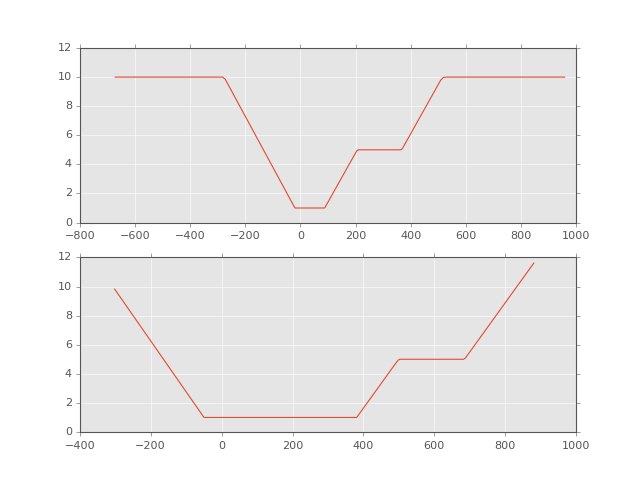

In [17]:
fig, ax = plt.subplots(2,1)
ax[0].plot(xx[1:], np.diff(xx))
ax[1].plot(yy[1:], np.diff(yy))

<IPython.core.display.Javascript object>


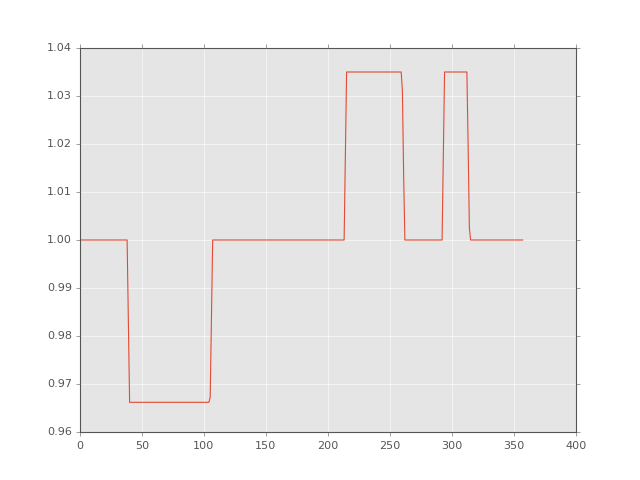

In [19]:
fig, ax = plt.subplots()
ax.plot(np.diff(xx)[1:]/np.diff(xx)[:-1])

<IPython.core.display.Javascript object>


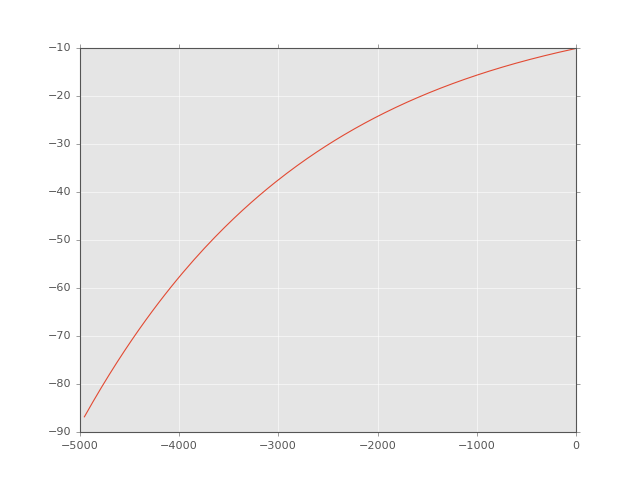

In [23]:
fig, ax = plt.subplots()
ax.plot(D['z'][1:],np.diff(D['z']))

## Figure 3: Surface velocity and energy flux Real run:

<IPython.core.display.Javascript object>


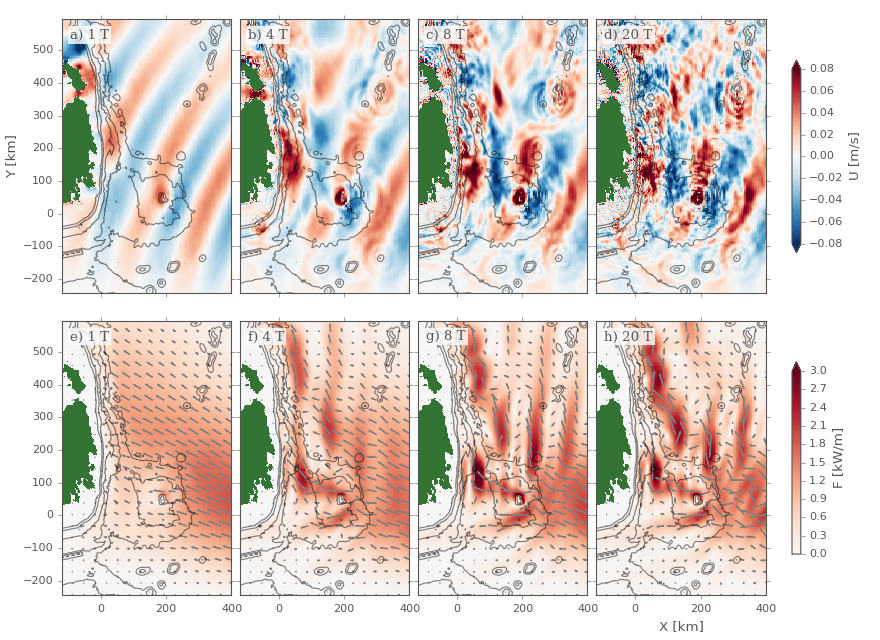

In [49]:
# Set up the plot:
fig,axs=subplots(2,4,sharex='all',sharey='all',figsize=(11,8))
fig.subplots_adjust(wspace=0.05,hspace=0.1,right=0.87,top=0.97,left=0.07,bottom=0.07)

times = [1,4,8,20]
#times = [1]
for col,time in enumerate(times):
    D=hdf5storage.loadmat('Tas3d/Real1km03/Diags%04d.mat'%(time*360))
    #    with open('Tas3d/Real1km03/Diags%04d.pickle'%(time*360),'rb') as f:
    #        D=pickle.load(f)
    H=D['Depth']
    x=D['x']/1e3;y=D['y']/1e3;U=D['U']; 
    ax=axs[0,col]
    pcm0=ax.pcolormesh(x,y,U,cmap=cm.RdBu_r,rasterized=True)
    pcm0.set_clim(np.array([-1.,1.])*0.08)
    plotdepthcont(ax,x,y,H)
    ax.set_aspect(1.)
    ax.text(0.05,1.-0.07,'%c) %d T'%(chr(ord('a')+col),time),
                fontsize=12,transform = ax.transAxes,color='#555555',
                family='serif',
               bbox=dict(facecolor='w', edgecolor='None',
                        alpha=0.8))
    
    ax=axs[1,col]
    pcm1=plotFluxes(ax,D,dx=35.,dy=35.)
    ax.text(0.05,1.-0.07,'%c) %d T'%(chr(ord('e')+col),time),
                fontsize=12,transform = ax.transAxes,color='#555555',
                family='serif',
               bbox=dict(facecolor='w', edgecolor='None',
                        alpha=0.8))

    
axs[0,0].set_ylabel('Y [km]')
axs[-1,-1].set_xlabel('X [km]')

ax.set_xticks(np.arange(-200.,1000.,200.))
ax.set_xlim([-120.,399.])
ax.set_ylim([-199.,550.])
colorbarRight(pcm0,axs[0,-1],fig,extend='both',shrink=0.7,label='U [m/s]',width=0.01)
colorbarRight(pcm1,axs[1,-1],fig,extend='max',shrink=0.7,label='F [kW/m]',width=0.01)
if 0:
    jmkprint('VelFluxReal1km03','PaperPlots.ipynb')
#   fig.savefig('doc/VelFluxReal1km03.pdf', 
#                bbox_inches = 'tight',
#                pad_inches = 0.2 )      


## Fig 4 energy budget

<IPython.core.display.Javascript object>


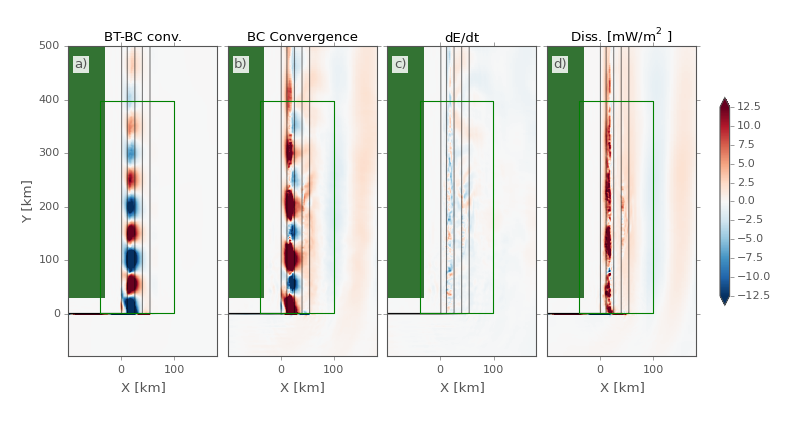

Axes(0.085,0.08;0.186461x0.89)
Axes(0.284513,0.08;0.186461x0.89)
Axes(0.484026,0.08;0.186461x0.89)
Axes(0.683539,0.08;0.186461x0.89)


In [20]:
# Figure 4: Energy budget:
names=['Real1km02','Shelf1km02','RiseNoSh1km02','NoTopo1km02']

names=['Shelf1km03','RiseShelf1km03','NoTopo1km03','Real1km03','RiseNoSh1km03','Real1kmWeak','RiseNoSh1kmWeak']

ax=[0,0,0,0]
for name in names[0:1]:
    tidecyc=20
    #print './Tas3d/'+name+'Diags%03d'%(tidecyc*360)
    D=hdf5storage.loadmat('./Tas3d/'+name+'/Diags%03d'%(tidecyc*360))
    H=D['Depth'];x=D['x']/1e3;y=D['y']/1e3
    fig = plotEnergyBudget(D,scale=1.)
    if 0:
        jmkprint('Diss%sCycle%d'%(name,tidecyc) ,'PaperPlots.ipynb')


## Fig 5: x-integrated energy flux

<IPython.core.display.Javascript object>


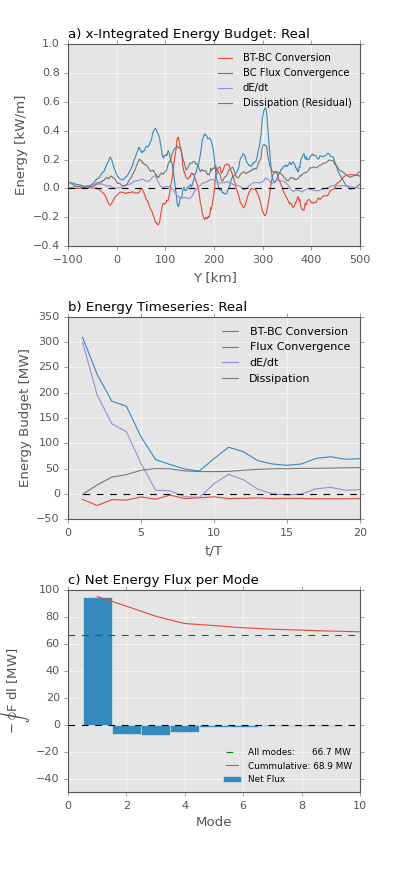

Real1km03
66.6512917862


In [51]:
# get mean terms for tide 20
names=['Real1km03','Shelf1km03','RiseNoSh1km03','NoTopo1km03']
titl= ['Real','Shelf','Rise','No Topo']
#names = ['Real1km01']
# get xl, yl from above
#xl = [0.,100.]
# yl=[0.,400.]

xl = [-50.,80.]
yl=[150.,200.]
for td in np.arange(0,1):
    name=names[td]
    tit=titl[td]
    dP=zeros(20);dis=zeros(20);de=zeros(20);con=zeros(20);FlE=zeros(20);
    FlS=zeros(20);FlN=zeros(20);FlW=zeros(20)
    for tind,tidecyc in enumerate(range(20,21)):
        D=hdf5storage.loadmat('Tas3d/%s/Diags%04d.mat'%(name,tidecyc*360))
        Pu=D['uPbc']
        Pv = D['vPbc']
        H=D['Depth']
        x=D['x']/1e3
        y=D['y']/1e3

        divPbc = diff(Pu[:-1,:],axis=1)/diff(x)
        divPbc+=(diff(Pv[:,:-1],axis=0).T/diff(y)).T
        divPbc=divPbc/1000.

        dEdt = ((D['Ebc']-D['Ebc0'])/12.4/3600.)[:-1,:-1]
        Conv = D['Conv'][:-1,:-1]

        dx=diff(x)
        dy=diff(y)
        indx = where((x>xl[0]) & (x<xl[1]))[0]
        dP=sum(divPbc[:,indx]*dx[newaxis,indx],axis=1)*1e3
        de=sum(dEdt[:,indx]*dx[newaxis,indx],axis=1)*1e3
        con=sum(Conv[:,indx]*dx[newaxis,indx],axis=1)*1e3

    fig, axs = plt.subplots(3, 1, figsize=(5,11.))
    fig.subplots_adjust(bottom=0.1,top=0.95,left=0.17,hspace=0.35)
    ax=axs[0]
    ax.plot(y[:-1],convolve(con,ones(12)/12.,mode='same'),label='BT-BC Conversion')
    ax.plot(y[:-1],-convolve(dP,ones(12)/12,mode='same'),label='BC Flux Convergence')
    ax.plot(y[:-1],convolve(de,ones(12)/12.,mode='same'),label='dE/dt')
    ax.plot(y[:-1],-convolve(de,ones(12)/12.,mode='same')
         -convolve(dP,ones(12)/12,mode='same')
         +convolve(con,ones(12)/12.,mode='same'),label='Dissipation (Residual)')
    ax.plot(y,0*y,'k--')
    ax.set_xlim([-100.,500.])
    ax.legend(fontsize=9,frameon=False)
    ax.set_ylabel('Energy [kW/m]')
    ax.set_title(r'a) x-Integrated Energy Budget: %s'%tit,fontsize=12,loc='left')
    ax.set_xlabel('Y [km]')

## Fig 6: Energy time series
# get time series
names=['Real1km03','Shelf1km03','RiseNoSh1km03','NoTopo1km03']
titl= ['Real','Shelf','Rise','No Topo']

#names = ['Real1km01']
# get xl, yl from above
#xl = [0.,100.]
# yl=[0.,400.]
xl = [-50.,80.]
yl=[0.,400.]
for td in range(0,1):
    name=names[td]
    tit=titl[td]
    print name
    dP=zeros(20)
    dis=zeros(20)
    de=zeros(20)
    con=zeros(20)
    FlE=zeros(20)
    FlS=zeros(20)
    FlN=zeros(20)
    FlW=zeros(20)
    for tind,tidecyc in enumerate(range(1,21)):
        D=hdf5storage.loadmat('Tas3d/%s/Diags%04d.mat'%(name,tidecyc*360)) 
        Pu=D['uPbc']
        Pv = D['vPbc']
        H=D['Depth']
        x=D['x']/1e3
        y=D['y']/1e3
        divPbc = diff(Pu[:-1,:],axis=1)/diff(x)
        divPbc+=(diff(Pv[:,:-1],axis=0).T/diff(y)).T
        divPbc=divPbc/1000.
        dEdt = ((D['Ebc']-D['Ebc0'])/12.4/3600.)[:-1,:-1]
        Conv = D['Conv'][:-1,:-1]
        dx=diff(x)
        dy=diff(y)
        indx = where((x>xl[0]) & (x<xl[1]))[0]
        indy = where((y>yl[0]) & (y<yl[1]))[0]
        dP[tind]=sum(divPbc[indy,:][:,indx]*dy[indy,newaxis]*dx[newaxis,indx])*1e3
        de[tind]=sum(dEdt[indy,:][:,indx]*dy[indy,newaxis]*dx[newaxis,indx])*1e3
        con[tind]=sum(Conv[indy,:][:,indx]*dy[indy,newaxis]*dx[newaxis,indx])*1e3
        FlE[tind]=sum(Pu[indy,indx[-1]]*dy[indy])
        FlW[tind]=sum(Pu[indy,indx[0]]*dy[indy])
        FlS[tind]=sum(Pv[indy[0],indx]*dx[indx])
        FlN[tind]=sum(Pv[indy[-1],indx]*dx[indx])
    
    ax=axs[1]
    dis = -de-dP+con
    tim = arange(1,21)
    ax.plot(tim,con,label='BT-BC Conversion')
    ax.plot(tim,-dP,label='Flux Convergence')
    ax.plot(tim,de,label='dE/dt')
    ax.plot(tim,dis,label='Dissipation')
    ax.plot(tim,tim*0.,'k--')
    ax.set_ylabel('Energy Budget [MW]')
    ax.set_xlabel('t/T')
    ax.legend(fontsize=10,frameon=False)
    ax.set_title('b) Energy Timeseries: %s'%tit,fontsize=12,loc='left')
    
    # plot the flux spectrum for the box
ax=axs[2]
name = 'Real1km03'
time = 20.
dec=1;phatoff=0.;aa=1./2.
Modes=hdf5storage.loadmat('Tas3d/%s/Modes.mat'%(name))
D=hdf5storage.loadmat('Tas3d/%s/Diags%04d.mat'%(name,time*360))
modes = np.arange(10)
Fl= 0.*modes
#fig,ax=plt.subplots(1,1,figsize=(3,3))
#fig.subplots_adjust(bottom=0.15,left=0.3)
for mode in range(0,10):
    u = Modes['UmAmp'][mode,::dec,::dec]*exp(1j*(Modes['UmPha'][mode,::dec,::dec]+phatoff))
    v = Modes['VmAmp'][mode,::dec,::dec]*exp(1j*(Modes['VmPha'][mode,::dec,::dec]+phatoff))
    p = Modes['PmAmp'][mode,::dec,::dec]*exp(1j*(Modes['PmPha'][mode,::dec,::dec]+phatoff))
    x=Modes['x']
    y=Modes['y']
    uP=aa*(real(p)*real(u)+imag(p)*imag(u))
    vP=aa*(real(p)*real(v)+imag(p)*imag(v))
    inx = where((x>0.) & (x<80.))[0]
    iny = where((y>0.) & (y<400.))[0]
    tot = -sum(uP[iny,inx[-1]]*diff(y)[iny]) \
        +0.*sum(uP[iny,inx[0]]*diff(y)[iny])  \
        -sum(vP[iny[-1],inx]*diff(x)[inx])\
        +sum(vP[iny[0],inx]*diff(x)[inx])
    Fl[mode]=tot
# get the total flux from 
x=D['x']/1e3;y=D['y']/1e3
uP=D['uPbc']
vP = D['vPbc']
inx = where((x>0.) & (x<80.))[0]
iny = where((y>0.) & (y<400.))[0]
tot = -sum(uP[iny,inx[-1]]*diff(y)[iny]) \
    +0.*sum(uP[iny,inx[0]]*diff(y)[iny])  \
    -sum(vP[iny[-1],inx]*diff(x)[inx])\
    +sum(vP[iny[0],inx]*diff(x)[inx])
print tot

ax.plot([0.,10.5],[0.,0],'k--')
ax.plot([0.,10.5],[0.,0]+tot,'g--',label='All modes:      %1.1f MW'%tot)
wid=1.
ax.bar(modes+1.-0.5*wid,Fl,label='Net Flux',width=wid)
ax.plot(modes+1.,cumsum(Fl),label='Cummulative: %1.1f MW'%sum(Fl))
ax.legend(fontsize=8,loc=4,frameon=False)
ax.set_ylim([-50.,100.])
ax.set_xlim([0.,10])
ax.set_ylabel('$-\oint\ F\ dl$ [MW]')
ax.set_xlabel('Mode')
ax.set_title('c) Net Energy Flux per Mode' ,loc='left',fontsize=12)
if 1:
    jmkprint('EnergyIntegrals%s'%name,'PaperPlots.ipynb')


## Modal energy fluxes

<IPython.core.display.Javascript object>


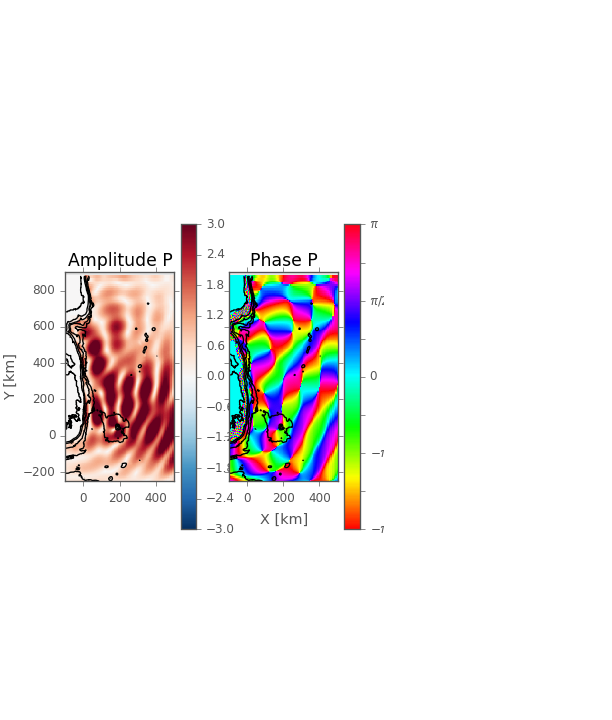

In [194]:
# get modal energy fluxes:
names =['Real1km03']
nn=[names[0]]
dec=1
mode=0
xl=[-100.,400.]
yl=[-150.,600.]
aa=1./2.
fig,axs=plt.subplots(2,2)
fig.subplots_adjust(hspace=0.027)
axs=axs.flatten()
for name in nn:
    if 1:
        Modes=hdf5storage.loadmat('Tas3d/%s/Modes.mat'%(name))
    if 1:
        phatoff=0.
        for mode in range(0,4):
            ax=axs[mode]
            if mode==0:
                fluxn=1.
            else:
                fluxn=4.
            
            u = Modes['UmAmp'][mode,::dec,::dec]*exp(1j*(Modes['UmPha'][mode,::dec,::dec]+phatoff))
            v = Modes['VmAmp'][mode,::dec,::dec]*exp(1j*(Modes['VmPha'][mode,::dec,::dec]+phatoff))
            p = Modes['PmAmp'][mode,::dec,::dec]*exp(1j*(Modes['PmPha'][mode,::dec,::dec]+phatoff))
            x=Modes['x']
            y=Modes['y']
            uP=aa*(real(p)*real(u)+imag(p)*imag(u))
            vP=aa*(real(p)*real(v)+imag(p)*imag(v))
            
            pcm=ax.pcolormesh(Modes['x'],Modes['y'],abs(uP+1j*vP),cmap=cmap2,rasterized=True)
            pcm.set_clim(array([0.,1.])*3./(mode+1)**2/fluxn)
#            colorbarRight(pcm,ax,fig,width=0.01,shrink=0.4)
            colorbar(pcm,ax=ax,extend='max',shrink=0.7)
            xg = arange(min(x),max(x),30.)
            yg = arange(min(y),max(y),30.)
    
            X,Y=meshgrid(xg,yg)
            # get Pug and Pvg
            Pug=0.*X
            Pvg=0.*Y
            for j in range(size(yg)):
                indy = where(y>yg[j])[0][0]
                Pug[j,:]=interp(xg,x,uP[indy,:])
                Pvg[j,:]=interp(xg,x,vP[indy,:])
        
            ax.quiver(X,Y,Pug*(mode+1.)**2*fluxn,Pvg*(mode+1)**2*fluxn,scale=20.,color='0.4',edgecolor=[])
            ax.set_xlim(xl)
            ax.set_ylim(yl)
            ax.set_aspect(1.)
            ax.set_title('Mode %d F [kW/m]'%(mode+1),fontsize=10)
            H = Modes['Depth']
            plotdepthcont(ax,x,y,H)
            
            # get the net flux
            inx = where((x>0.) & (x<80.))[0]
            iny = where((y>0.) & (y<400.))[0]
            tot = -sum(uP[iny,inx[-1]]*diff(y)[iny]) \
                +0.*sum(uP[iny,inx[0]]*diff(y)[iny])  \
                -sum(vP[iny[-1],inx]*diff(x)[inx])\
                +sum(vP[iny[0],inx]*diff(x)[inx])\
            
            ax.plot(x[inx[[0,0,-1,-1,0]]],y[iny[[0,-1,-1,0,0]]],'g-')
                
            
            ax.text(200.,-110.,'%1.1f MW'%tot)
            if mode>1:
                ax.set_xlabel('X [km]')
            else:
                ax.set_xticklabels('')
                
            if (mode==0) | (mode==2):
                ax.set_ylabel('Y [km]')
            else:
                ax.set_yticklabels('')   
        sublabel(axs)
        if 1:
            jmkprint('ModeFluxes%s'%name,'PaperPlots.ipynb')

<IPython.core.display.Javascript object>


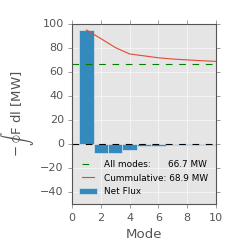

66.6512917862


In [11]:
# plot the flux spectrum for the box
name = 'Real1km03'
time = 20.
dec=1;phatoff=0.;aa=1./2.
Modes=hdf5storage.loadmat('Tas3d/%s/Modes.mat'%(name))
D=hdf5storage.loadmat('Tas3d/%s/Diags%04d.mat'%(name,time*360))
modes = np.arange(10)
Fl= 0.*modes
fig,ax=plt.subplots(1,1,figsize=(3,3))
fig.subplots_adjust(bottom=0.15,left=0.3)
for mode in range(0,10):
    u = Modes['UmAmp'][mode,::dec,::dec]*exp(1j*(Modes['UmPha'][mode,::dec,::dec]+phatoff))
    v = Modes['VmAmp'][mode,::dec,::dec]*exp(1j*(Modes['VmPha'][mode,::dec,::dec]+phatoff))
    p = Modes['PmAmp'][mode,::dec,::dec]*exp(1j*(Modes['PmPha'][mode,::dec,::dec]+phatoff))
    x=Modes['x']
    y=Modes['y']
    uP=aa*(real(p)*real(u)+imag(p)*imag(u))
    vP=aa*(real(p)*real(v)+imag(p)*imag(v))
    inx = where((x>0.) & (x<80.))[0]
    iny = where((y>0.) & (y<400.))[0]
    tot = -sum(uP[iny,inx[-1]]*diff(y)[iny]) \
        +0.*sum(uP[iny,inx[0]]*diff(y)[iny])  \
        -sum(vP[iny[-1],inx]*diff(x)[inx])\
        +sum(vP[iny[0],inx]*diff(x)[inx])
    Fl[mode]=tot
# get the total flux from 
x=D['x']/1e3;y=D['y']/1e3
uP=D['uPbc']
vP = D['vPbc']
inx = where((x>0.) & (x<80.))[0]
iny = where((y>0.) & (y<400.))[0]
tot = -sum(uP[iny,inx[-1]]*diff(y)[iny]) \
    +0.*sum(uP[iny,inx[0]]*diff(y)[iny])  \
    -sum(vP[iny[-1],inx]*diff(x)[inx])\
    +sum(vP[iny[0],inx]*diff(x)[inx])
print tot

ax.plot([0.,10.5],[0.,0],'k--')
ax.plot([0.,10.5],[0.,0]+tot,'g--',label='All modes:      %1.1f MW'%tot)
wid=1.
ax.bar(modes+1.-0.5*wid,Fl,label='Net Flux',width=wid)
ax.plot(modes+1.,cumsum(Fl),label='Cummulative: %1.1f MW'%sum(Fl))
ax.legend(fontsize=8,loc=4,frameon=False)
ax.set_ylim([-50.,100.])
ax.set_xlim([0.,10])
ax.set_ylabel('$-\oint\ F\ dl$ [MW]')
ax.set_xlabel('Mode')
if 1:
    jmkprint('RealEnergyFluxModesSum','PaperPlots.ipynb')
    

## Figure 8: Compare w/ w/o rise

<IPython.core.display.Javascript object>


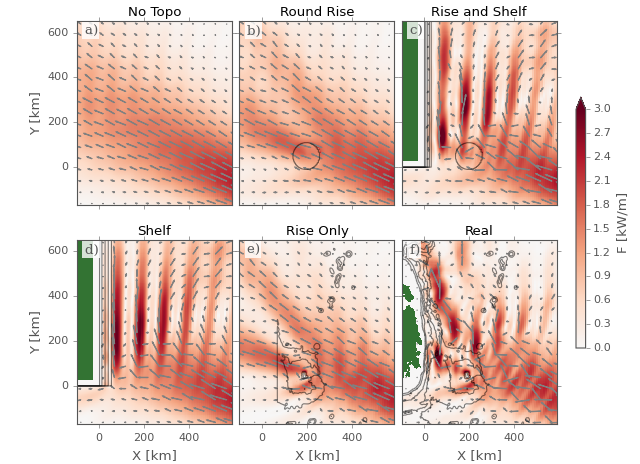

In [6]:
names = ['NoTopo1km03','RoundRise1km03','RiseShelf1km03','Shelf1km03','RiseNoSh1km03','Real1km03']
titl=['No Topo','Round Rise','Rise and Shelf','Shelf','Rise Only','Real']
figname='EnergyFluxesAll'
tidecyc=20
fig,axs=plt.subplots(2,3,figsize=(8,5.8))
axs=axs.flatten()
fig.subplots_adjust(right=0.87,wspace=0.075)
fig.subplots_adjust(wspace=0.05,hspace=0.1,right=0.87,top=0.97,left=0.12,bottom=0.07)
hh = list()
for td in range(6):
    if td==50:
        pass
        # we will do below
    else:
        name = names[td]
        tit = titl[td]
        D=hdf5storage.loadmat('Tas3d/%s/Diags%04d.mat'%(name,tidecyc*360))
        x = D['x']/1e3
        y = D['y']/1e3
        indy=where(y>=50)[0][0]
        hh+=[D['Depth'][indy,:]]
        ax=axs[td]
        pcm=plotFluxes(ax,D)
        ax.set_xticks(np.arange(-200.,601.,200.))
        ax.set_yticks(np.arange(-200.,601.,200.))
        ax.set_xlim([-100.,590.])
        ax.set_ylim([-170.,650.])
        if ((td==0) | (td==3)):
            ax.set_ylabel('Y [km]')
        else:
            ax.set_yticklabels('')

        if td>2:
            ax.set_xlabel('X [km]')
        else:
            ax.set_xticklabels('')
        ax.set_title(titl[td],fontsize=12)
        ax.text(0.05,1.-0.07,'%c) '%(chr(ord('a')+td)),
                    fontsize=12,transform = ax.transAxes,color='#555555',
                    family='serif',
                   bbox=dict(facecolor='w', edgecolor='None',
                            alpha=0.8))
colorbarRight(pcm,axs,fig,extend='max',width=0.015,shrink=0.6,label='F [kW/m]')
if 0:
    jmkprint(figname,'PaperPlots.ipynb')
    
    

## Topographic profiles.  

<IPython.core.display.Javascript object>


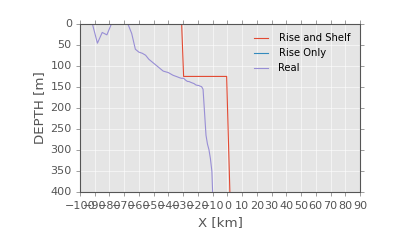

In [11]:
# uses data from above
fig,ax=plt.subplots(figsize=(5,3))
fig.subplots_adjust(left=0.2,bottom=0.2)
for td in [2,4,5]:
    h = hh[td]
    ax.plot(x,h,label=titl[td])
ax.set_xticks(np.arange(-200.,601.,200.))

ax.set_xlim(axs[0].get_xlim())
ax.set_ylim([5000,-1000])
#ax.set_aspect(1./8.)
ax.set_ylabel('DEPTH [m]')
ax.set_xlabel('X [km]')
ax.legend(fontsize=9,frameon=False)  
ax.set_xlabel('X [km]')
ax.set_xlim([-50.,50.])
ax.set_ylim([400,00.])
ax.set_xticks(np.arange(-100.,100.,10.))
if 0:
    jmkprint('TopographicProfiles','PaperPlots.ipynb')

In [195]:
# Phase

<IPython.core.display.Javascript object>


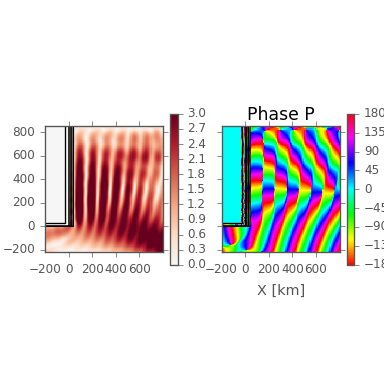

P


In [209]:
dec=1
import matplotlib.gridspec as gridspec
fig,axs=plt.subplots(1,2,figsize=(4,4))


pi = np.pi
mode = 0
names =['Real1km03','Shelf1km03','NoTopo1km03','RiseNoSh1km03']
for name in names[1:2]:
    if 1:
        Modes = hdf5storage.loadmat('Tas3d/%s/Modes.mat'%(name))
    if 1:
        td = ['P']
        xl = [-199.99,800.]
        yl = [-220,850.]
        for nn,tt in enumerate(td):
            print tt
            Amp = Modes['%cmAmp'%tt][mode,::dec,::dec]
            Pha = Modes['%cmPha'%tt][mode,::dec,::dec]
            #if namen==2:
            #    Pha=Pha+pi
            #    Pha[Pha>pi]+=-(2.*pi)
            x=Modes['x'][::dec]
            y=Modes['y'][::dec]
            ax=axs[0]
            pcm1=ax.pcolormesh(x,y,Amp,cmap=cmap2,rasterized=True)
            pcm1.set_clim(array([0.,1.])*3.)
            ax.set_aspect(1.)
            ax.set_xticks(arange(-200.,700.,200.))
            ax.set_xlim(xl)
            ax.set_ylim(yl)
            ax.contour(Modes['x'],Modes['y'],Modes['Depth'],-array([0,-250.,-1000.,-2000.,-3000.]),colors='k')
            title('Amplitude '+tt)
            if nn==0:
                ax.set_ylabel('Y [km]')

            
            colorbar(pcm1,ax=axs[0],shrink=0.5)
            
                
            ax=axs[1]
            pcm2=pcolormesh(x,y,Pha*180/np.pi,cmap=cm.hsv,rasterized=True)
            pcm2.set_clim([-180,180.])
            ax.set_aspect(1.)
            ax.set_xticks(arange(-200.,700.,200.))
            ax.set_xlim(xl)
            ax.set_ylim(yl)
            ax.contour(Modes['x'],Modes['y'],Modes['Depth'],-array([0,-250.,-1000.,-2000.,-3000.]),colors='k')
            ax.set_title('Phase '+tt)
            ax.set_xlabel('X [km]')
            ax.set_yticklabels('')
            cax=colorbar(pcm2,shrink=0.5,ax=axs[1])
            cax.set_ticks(arange(-pi,pi+0.1,pi/4.)*180./np.pi)
            #cax.set_ticklabels(['$-\pi$','','$-\pi/2$','','0','','$\pi/2$','','$\pi$'])
            
        if 0:
            jmkprint('AmpPhaMode%dJustP%s'%(mode+1,name),'ProcessHaiseTas3d.ipynb')

## Plot incoming versus outgoing:

In [86]:
# first make a helper function to do the energy budget.  
def getReflect(In,To,mode):
    ui = In['UmAmp'][mode,::dec,::dec]*exp(1j*(In['UmPha'][mode,::dec,::dec]+phatoff))
    vi = In['VmAmp'][mode,::dec,::dec]*exp(1j*(In['VmPha'][mode,::dec,::dec]+phatoff))
    pin = In['PmAmp'][mode,::dec,::dec]*exp(1j*(In['PmPha'][mode,::dec,::dec]+phatoff))
    x=In['x']
    y=In['y']
    uPi=aa*(real(pin)*real(ui)+imag(pin)*imag(ui))
    vPi=aa*(real(pin)*real(vi)+imag(pin)*imag(vi))
    
    ut = To['UmAmp'][mode,::dec,::dec]*exp(1j*(To['UmPha'][mode,::dec,::dec]))
    vt = To['VmAmp'][mode,::dec,::dec]*exp(1j*(To['VmPha'][mode,::dec,::dec]))
    pt = To['PmAmp'][mode,::dec,::dec]*exp(1j*(To['PmPha'][mode,::dec,::dec]))    
    uPt=aa*(real(pt)*real(ut)+imag(pt)*imag(ut))
    vPt=aa*(real(pt)*real(vt)+imag(pt)*imag(vt))
    H = To['Depth']

    ur=ut-ui
    vr=vt-vi
    pr=pt-pin
    
    uPr=aa*(real(pr)*real(ur)+imag(pr)*imag(ur))
    vPr=aa*(real(pr)*real(vr)+imag(pr)*imag(vr))
    uPc = aa*(real(pr)*real(ui)+real(pin)*real(ur)+
              imag(pr)*imag(ui)+imag(pin)*imag(ur))
    vPc = aa*(real(pr)*real(vi)+real(pin)*real(vr)+
              imag(pr)*imag(vi)+imag(pin)*imag(vr))
    
    Pr=uPr+1j*vPr
    Pt=uPt+1j*vPt
    Pi=uPi+1j*vPi
    Pc = uPc+1j*vPc
    
    return Pi,Pr,Pc,Pt


In [87]:
def todeg(x):
    return x*180./np.pi
om = 2*pi/12.4/3600.
f = -1.e-4
ce=2.9
ce=2.81
ka=sqrt(om**2-f**2)/ce
def fitTwoWaves(x,y,u,v,p,ang1,ang2,ka,om,f):
    '''
    def fitTwoWaves(x,y,u,v,p,ang1,ang2,ka,om,f)
    
    Fit two waves to moorings at x,y with (complex) velocities u,v,p.  
    Search through angles given by ang1 and ang2.
    
    x, y should be in meters (and shape (N), where N is # of moorings)
    
    ka is the mode-1 wavenumper (cpm), om is frequency of wave (rad/m)
    and f is Coriolis (rad/m)
    
    returns: Amp1, Ang1, Fu1,Fv1, Amp2, Ang2, Fu2, Fv2
    '''
    
    import numpy as np
    
    Nwaves=2
    Nmoor = len(x)
    print Nmoor
    b = np.zeros(Nmoor*3,dtype=np.complex)
    for m in range(Nmoor):
        b[m*3] = u[m]
        b[m*3+1] = v[m]
        b[m*3+2] = p[m]
        
    
    er=zeros((len(ang2),len(ang1)))
    Aa1=zeros((len(ang2),len(ang1)))+1j*0
    Aa2=zeros((len(ang2),len(ang1)))+1j*0
    a = np.zeros((Nmoor*3,Nwaves))+1j*0.
    for n2,an2 in enumerate(ang2):
        for n1,an1 in enumerate(ang1):
            for nnn in range(2):
                an = an1
                if nnn==1:
                    an = an2
                k=np.cos(an)*ka
                l=np.sin(an)*ka
                for m in range(Nmoor):
                    a[m*3,nnn]=(k*om+1j*l*f)/(om**2-f**2)*np.exp(1j*(k*xx[m] +l*yy[m]))
                    a[m*3+1,nnn]=(l*om-1j*k*f)/(om**2-f**2)*np.exp(1j*(k*xx[m] +l*yy[m]))
                    a[m*3+2,nnn]=np.exp(1j*(k*xx[m] +l*yy[m]))

            A,res,rank,s = np.linalg.lstsq(a,b)
            if len(res)>0: 
            # axs[1].plot(ang*180./np.pi,np.abs(A),'.')
                er[n2,n1]=res;
                Aa1[n2,n1]=A[0];Aa2[n2,n1]=A[1]
            else:
                er[n2,n1]=300.;Aa1[n2,n1]=np.NAN;Aa2[n2,n1]=np.NAN
    
    ind = np.argmin(er.flatten())
    Amp1=Aa1.flatten()[ind]
    Amp2=Aa2.flatten()[ind]
    Angs1,Angs2=np.meshgrid(ang1,ang2)
    Ang1=Angs1.flatten()[ind]
    Ang2=Angs2.flatten()[ind]
    
    k=np.cos(Ang1)*ka
    l=np.sin(Ang1)*ka
    # print ang*180./np.pi
    pp = Amp1*np.exp(1j*(k*xx[0]+l*yy[0]))
    uu = pp*(k*om+1j*l*f)/(om**2-f**2)
    vv = pp*(l*om-1j*k*f)/(om**2-f**2)
    pp1=pp;uu1=uu
    Fu1 = .5*(real(uu)*real(pp)+imag(uu)*imag(pp))
    Fv1 = .5*(real(vv)*real(pp)+imag(vv)*imag(pp))
    
    k=np.cos(Ang2)*ka
    l=np.sin(Ang2)*ka
    # print ang*180./np.pi
    pp = Amp2*np.exp(1j*(k*xx[0]+l*yy[0]))
    uu = pp*(k*om+1j*l*f)/(om**2-f**2)
    vv = pp*(l*om-1j*k*f)/(om**2-f**2)
    Fu2 = .5*(real(uu)*real(pp)+imag(uu)*imag(pp))
    Fv2 = .5*(real(vv)*real(pp)+imag(vv)*imag(pp))   
    return Amp1, Ang1, Fu1,Fv1, Amp2, Ang2, Fu2, Fv2
    

In [97]:
# now lets compare pairs:
# Incoming and Shelf
# Just Rise and Incoming
# etc
incoming = 'NoTopo1km03'
total='RiseNoSh1km03'
outname='RiseResponseMode%d'

incoming = 'RiseNoSh1kmWeak'
total='Real1kmWeak'
outname='RealResponseWeak%d'

incoming = 'NoTopo1km03'
total='Shelf1km04'
outname='ShelfResponseMode%d'

incoming = 'RoundRise1km03'
total='RiseShelf1km03'
outname='RiseShelfResponseMode%d'

incoming = 'RiseNoSh1km03'
total='Real1km03'
outname='RealResponseMode%d'

In = hdf5storage.loadmat('Tas3d/%s/Modes.mat'%(incoming))
To = hdf5storage.loadmat('Tas3d/%s/Modes.mat'%(total))
# we need the barotropic terms as well (I think)
Bt = hdf5storage.loadmat('Tas3d/%s/Diags7200.mat'%total)
H=To['Depth']
x = To['x']
y = To['y']
Td = To

In [98]:
# Add Mooring estimate quivers...
td = [1,2,3]
u = np.zeros(len(td),dtype=np.complex)
v = np.zeros(len(td),dtype=np.complex)
p = np.zeros(len(td),dtype=np.complex)
xx = np.zeros(len(td))
yy = np.zeros(len(td))
for m in range(len(td)):
    mm=td[m]
    xxx=xmoor[mm];yyy=ymoor[mm];
    inx = where(x>=xxx)[0][0]
    iny = where(y>=yyy)[0][0]
    u[m] = Td['UmAmp'][mode,iny,inx]*exp(-1j*(Td['UmPha'][mode,iny,inx]))
    v[m]= Td['VmAmp'][mode,iny,inx]*exp(-1j*(Td['VmPha'][mode,iny,inx]))
    p[m] = Td['PmAmp'][mode,iny,inx]*exp(-1j*(Td['PmPha'][mode,iny,inx]))
    xx[m]=x[inx]*1000.
    yy[m]=y[iny]*1000.
print u
ang1=np.arange(110,170.,1.)*np.pi/180.
ang2=np.arange(10.,45.,1.)*np.pi/180.
Amp1,Ang1,Fu1,Fv1,Amp2,Ang2,Fu2,Fv2=fitTwoWaves(xx,yy,u,v,p,ang1,ang2,ka,om,f)
InF=np.abs(Fu1+1j*Fv1)
OutF= np.abs(Fu2+1j*Fv2)
print InF,OutF,(InF-OutF)/InF
axs[0].quiver(mean(xx)/1000.,np.mean(yy)/1000.,Fu1,Fv1,scale=20./(mode+1)**2/fluxn,color='g',edgecolor=[])
axs[1].quiver(mean(xx)/1000.,np.mean(yy)/1000.,Fu2,Fv2,scale=20./(mode+1)**2/fluxn,color='g',edgecolor=[])
fig.show()
if saveplot:
    jmkprint(outname%(mode+1),'ProcessHaiseTas3d.ipynb')

[ 1.26382340+0.68718742j  0.04535878+0.29736704j -0.62257649-0.12655256j]
3
1.28474440454 0.613009819708 0.522854649112


In [99]:
ind = where((xmoor>100.)&(ymoor>120))

<IPython.core.display.Javascript object>


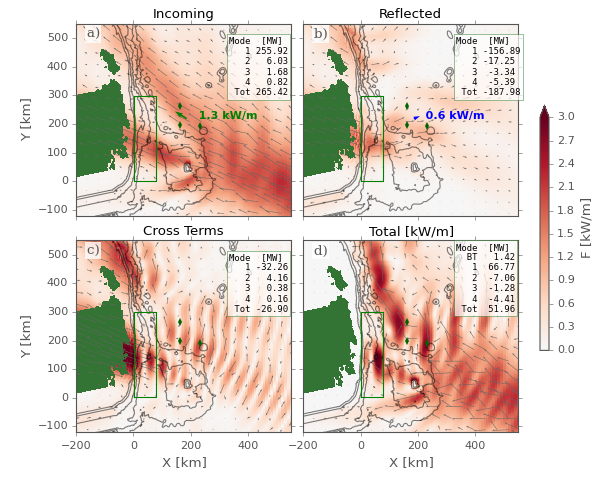

0
BT 1.42


In [108]:
import matplotlib as mp
phatoff=0.
saveplot=0.
glider = 2
zoom=0
moors=1
dec=1
phatoff=np.pi*0.
#djmkfigure(2,0.4)
fig,axs=plt.subplots(2,2,figsize=(10*3./4.,8*3./4.))
fig.subplots_adjust(right=0.82,left=0.15)
fig.subplots_adjust(wspace=0.02,hspace=0.13,right=0.87,top=0.95,left=0.12,bottom=0.1)

axs=axs.flatten()

titl=['Incoming','Reflected','Cross Terms','Total [kW/m]']
aa=1./sqrt(2.)
aa=1./2.
for mode in [0]:
    print mode
    if mode==0:
        fluxn=1.
    else:
        fluxn=4.
    
    # get energy budget:
    aa=1./2.
    Psum = zeros((11,5))
    for modee in range(10):
        Pi,Pr,Pc,Pt = getReflect(In,To,modee)

        for ind,pp in enumerate([Pi,Pr,Pc,Pt]):
            # xl = [-40.,100.];yl=[0.,400.]
        
            inx = where((x>0.) & (x<80.))[0]
            iny = where((y>0.) & (y<400.))[0]
            if glider==1:  # this is for comparison Spray 65, Johnston et al.  Used in Discussion
                inx = where((x>0.) & (x<80.))[0]
                iny = where((y>80.) & (y<200.))[0]
            elif glider==2:  # this is for comparison Spray 65, Johnston et al.  Used in Discussion
                inx = where((x>0.) & (x<80.))[0]
                iny = where((y>0.) & (y<300.))[0]
            xl = [np.min(x[inx]),np.max(x[inx])]
            yl = [np.min(y[iny]),np.max(y[iny])]
            
            
            uP=real(pp);vP=imag(pp)
            Psum[modee,ind+1]= -sum(uP[iny,inx[-1]]*diff(y)[iny]) \
                    +0.*sum(uP[iny,inx[0]]*diff(y)[iny])  \
                    -sum(vP[iny[-1],inx]*diff(x)[inx])\
                    +sum(vP[iny[0],inx]*diff(x)[inx])
            Psum[modee,0]=mode+1
    Psum[modee+1,:]=sum(Psum,axis=0)
    Pi,Pr,Pc,Pt = getReflect(In,To,mode)
    # get barotropic term:
    uP = Bt['uPbt'];vP=Bt['vPbt'];
    Pbt = -sum(uP[iny,inx[-1]]*diff(y)[iny]) \
                    +0.*sum(uP[iny,inx[0]]*diff(y)[iny])  \
                    -sum(vP[iny[-1],inx]*diff(x)[inx])\
                    +sum(vP[iny[0],inx]*diff(x)[inx])
    Psum[modee+1,-1]+=Pbt
    print 'BT %1.2f'%Pbt
    for ind,pp in enumerate([Pi,Pr,Pc,Pt]):
        ax=axs[ind]
        #plotFlux()
        pcm1=ax.pcolormesh(x,y,abs(pp),cmap=cmap2,rasterized=True)
        pcm1.set_clim(array([-0.,1.])*3./(mode+1)**2/fluxn)
        ax.set_aspect(1.)
        plotdepthcont(ax,x,y,H)
        ax.set_ylim([-120,550.])
        ax.set_xlim([-150.,550.])
        if zoom:
            ax.set_ylim([-120,750.])
            ax.set_xlim([-150.,550.])
        
        xg = np.arange(np.min(x),np.max(x),40.)
        yg = np.arange(np.min(y),np.max(y),40.)
        if zoom:
            xg = np.arange(np.min(x),np.max(x),20.)
            yg = np.arange(np.min(y),np.max(y),20.)
    
        X,Y=np.meshgrid(xg,yg)
        # get Pug and Pvg
        Pug=0.*X
        Pvg=0.*Y
        for j in range(size(yg)):
            indy = where(y>yg[j])[0][0]
            aa=np.interp(xg,x,real(pp[indy,:]))
            Pug[j,:]=aa
            Pvg[j,:]=np.interp(xg,x,imag(pp[indy,:]))
        ax.quiver(X,Y,Pug,Pvg,scale=20./(mode+1)**2/fluxn,color='0.4',edgecolor=[])
            
        
        if moors:
#            plotMoor(ax)
            ax.plot(xmoor[[1,2,3]],ymoor[[1,2,3]],'d',color='darkgreen',markersize=5,markeredgecolor='None')
            F1 = np.abs(Fu1+1j*Fv1)
            F2 = np.abs(Fu2+1j*Fv2)
            if ind==0:
                ax.quiver(mean(xx)/1000.,np.mean(yy)/1000.,Fu1,Fv1,scale=20./(mode+1)**2/fluxn,color='g',edgecolor=[])
                ax.text(np.mean(xx)/1000.,np.mean(yy)/1000.,'   %1.1f kW/m'%F1,color='green',fontweight='bold')
            if ind==1:
                ax.quiver(mean(xx)/1000.,np.mean(yy)/1000.,Fu2,Fv2,scale=20./(mode+1)**2/fluxn,color='blue',edgecolor=[])
                ax.text(np.mean(xx)/1000.,np.mean(yy)/1000.,'   %1.1f kW/m'%F2,color='blue',fontweight='bold')

        if (ind==0)|(ind==2):
            ax.set_ylabel('Y [km]')
        else:
            ax.set_yticklabels('')
        if ind>=2:
            ax.set_xlabel('X [km]')
        else:
            ax.set_xticklabels('')
        ax.set_xticks(arange(-200.,600.,200.))
        ax.set_title(titl[ind],fontsize=12)
        ax.text(0.05,1.-0.07,'%c) '%(chr(ord('a')+ind)),
                    fontsize=12,transform = ax.transAxes,color='#555555',
                    family='serif',
                   bbox=dict(facecolor='w', edgecolor='None',
                            alpha=0.8))
        cell_txt='Mode  [MW]\n'
        if ind==3:
            cell_txt+='  BT %6.2f\n'%Pbt
        for mm in range(4):
            cell_txt+='%4d %6.2f\n'%(mm+1,Psum[mm,ind+1])
        # barotropic for total:
        cell_txt+=' Tot %6.2f'%Psum[-1,ind+1]
        ax.text(335,300,cell_txt,fontsize=8,family='monospace',
                bbox=dict(facecolor='w', edgecolor='darkgreen',alpha=0.7))
        
        plotBox(ax,x,y,xl,yl)

#    colorbarRight(pcm1,axs,fig,shrink=0.5,extend='max')
    
    colorbarRight(pcm1,axs,fig,extend='max',width=0.015,shrink=0.6,label='F [kW/m]')
    if (saveplot==1.) & (glider<1.):
        print outname
        if zoom:
            jmkprint(outname%(mode+1)+'Zoom','ProcessHaiseTas3d.ipynb')
        else:
            jmkprint(outname%(mode+1),'ProcessHaiseTas3d.ipynb')

In [33]:
print 2*pi/12.4/3600./1.e-4

1.40752359032


In [18]:
# These are the actual fluxes
fig,axs=plt.subplots(4,1,sharex=True,figsize=(10,14))
xind = where(x>80.)[0][0]
xleft = where(x>0.)[0][0]
# Pi,Pr,Pc,Pt
ytop = where(y>400.)[0][0]
#ytop=size(y)-40

ybot = where(y>00.)[0][0]
#ybot=40

Pi,Pr,Pc,Pt = getReflect(In,To,0)
lab = ['Incoming','Reflected','Cross','Net']
for ind,pp in enumerate([Pi,Pr,Pc,Pt]):
        
    inx = where((x>0.) & (x<80.))[0]
    iny = where((y>00.) & (y<400.))[0]
    uP=real(pp)
    vP=imag(pp)
    Psum= -sum(uP[iny,inx[-1]]*diff(y)[iny]) \
            +0.*sum(uP[iny,inx[0]]*diff(y)[iny])  \
            -sum(vP[iny[-1],inx]*diff(x)[inx])\
            +sum(vP[iny[0],inx]*diff(x)[inx])
    axs[0].plot(y,uP[:,inx[-1]],label='%s  %1.1f MW'%(lab[ind],Psum))
    axs[1].plot(y,vP[:,inx[-1]],label='%s  %1.1f MW'%(lab[ind],Psum))


axs[0].plot(y,0*y,'k--')

axs[0].set_xlim(y[ybot]-150.,600.)
axs[0].set_ylim([-2.5,4.5])
axs[0].set_xlabel('Y [km]')
axs[0].set_ylabel('Flux [kW/m]')
axs[0].set_title('Shelf: Energy Flux at x=80 km' )
axs[0].legend()


<IPython.core.display.Javascript object>

ValueError: operands could not be broadcast together with shapes (42,) (608,360) 

In [36]:
# Try another approach.  Search angles and linear fit of amplitudes:
# two waves.  Works great!
from numpy.linalg import lstsq

# one wave
Td = To
mode=0
y0s=np.arange(-100,801,50)
#y0s=np.array([400.])
Fu1 = 0.*y0s
Fv1 = 0.*y0s
Fu2 = 0.*y0s
Fv2 = 0.*y0s
ang1s=0.*y0s
ang2s=0.*y0s

for yind,y0 in enumerate(y0s):
    print yind,
    
    x0=100.
    om = 2*pi/12.4/3600.
    f = -1.e-4
    ce=2.9
    ce=2.81
    ka=sqrt(om**2-f**2)/ce
    
    # mooring locations:
    xs = np.array([-40.,40.])+x0
    ys = np.array([0.,-0.])+y0
    
    Nmoor=len(xs)
    b = np.zeros(Nmoor*3)+1j*0
    xx=np.zeros(Nmoor);yy=np.zeros(Nmoor)
    u=np.zeros(Nmoor,dtype=np.complex);v=zeros(Nmoor,dtype=np.complex)
    p=np.zeros(Nmoor,dtype=np.complex)
    
    for m in range(Nmoor):
        xxx=xs[m];yyy=ys[m];
        inx = where(x>=xxx)[0][0]
        iny = where(y>=yyy)[0][0]
        # get observed values at this mooring
        u[m] = Td['UmAmp'][mode,iny,inx]*exp(-1j*(Td['UmPha'][mode,iny,inx]))
        v[m]= Td['VmAmp'][mode,iny,inx]*exp(-1j*(Td['VmPha'][mode,iny,inx]))
        p[m] = Td['PmAmp'][mode,iny,inx]*exp(-1j*(Td['PmPha'][mode,iny,inx]))
        xx[m]=x[inx]*1000.
        yy[m]=y[iny]*1000.
    
    ang1=np.arange(110,170.,1.)*np.pi/180.
    ang2=np.arange(10.,45.,1.)*np.pi/180.
    
    
    Amp1,Ang1,Fu1[yind],Fv1[yind],Amp2,Ang2,Fu2[yind], Fv2[yind]=fitTwoWaves(xx,yy,u,v,p,ang1,ang2,ka,om,f)
    ang1s[yind]=Ang1
    ang2s[yind]=Ang2


0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
11 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2


<IPython.core.display.Javascript object>


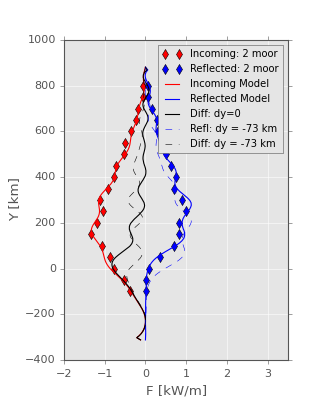

-72.7940468532


(-2.0, 3.5)

In [37]:
fig,axs=plt.subplots(1,1,sharey=True,figsize=(4,5))

fig.subplots_adjust(left=0.2)
axs=[axs]
inx = where((x>0.) & (x<=100))[0]
#axs.plot(y,imag(Pi[:,inx[-1]]),':')
axs[0].plot(Fu1,y0s,'rd',label='Incoming: 2 moor')
axs[0].plot(Fu2,y0s,'bd',label='Reflected: 2 moor')
axs[0].plot(real(Pi[:,inx[-1]]),y,'r',label='Incoming Model')
axs[0].plot(real(Pr[:,inx[-1]]),y,'b',label='Reflected Model')
axs[0].plot((real(Pi[:,inx[-1]])+real(Pr[:,inx[-1]])),y,'k',label='Diff: dy=0')
dy = -2.*100.*np.tan((180-160.)*np.pi/180)
print dy
offs = np.interp(y,y+dy,real(Pr[:,inx[-1]]))
axs[0].plot(offs,y,'b--',label='Refl: dy = %2.0f km'%dy, linewidth=0.5)
axs[0].plot((real(Pi[:,inx[-1]])+offs),y,'k--',label='Diff: dy = %2.0f km'%dy,linewidth=0.5)
axs[0].legend(fontsize=9)
axs[0].set_ylabel('Y [km]')
axs[0].set_xlabel('F [kW/m]')
axs[0].set_xlim([-2.,3.5])
#axs[1].plot(y0s,ang1s*180./np.pi,'d')
#axs[1].plot(y0s,ang2s*180./np.pi,'d')
#axs[1].plot(y,(real(Pi[:,inx[-1]])+real(Pr[:,inx[-1]])),':')
#axs[1].plot((real(Pi[:,inx[-1]])+offs)/real(Pi[:,inx[-1]]),y,'k--',linewidth=0.5)
#axs[1].plot((real(Pi[:,inx[-1]])+real(Pr[:,inx[-1]]))/real(Pi[:,inx[-1]]),y,'k')
#axs[1].set_xlim([-1.,1.5])

<IPython.core.display.Javascript object>


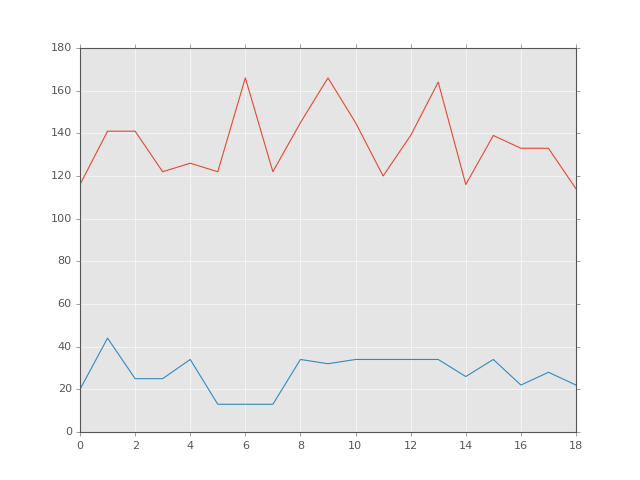

In [32]:
fig,ax=plt.subplots()
plot(ang1s)
plot(ang2s)

In [627]:
A1,A2=np.meshgrid(ang1,ang2)
ind = np.argmin(er.flatten())
a1=A1.flatten()[ind]
a2=A2.flatten()[ind]
print a1*180./np.pi,a2*180./np.pi,

160.0 10.0


In [933]:
print 1./sinh(1000)

0.0


/Users/jklymak/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: overflow encountered in sinh
  if __name__ == '__main__':


[-0.15956150-0.09084691j -0.08060900-0.08309601j  0.38527015+0.20016033j
  0.27762831+0.00856494j  0.32001822-0.06121191j -0.16639609+0.22578873j
  0.14511535+0.06713207j  0.06519428-0.01138719j  0.05666596-0.21922613j
  0.13629277-0.11211039j]


In [778]:
print Td.keys()

['VbtPha', 'PbtPha', 'PmAmp', 'UbtAmp', 'UmPha', 'UmAmp', 'UbtPha', 'VbtAmp', 'Depth', 'PmPha', 'VmAmp', 'VmPha', 'y', 'x', 'PbtAmp']


In [791]:
# get the vertical modes
D=hdf5storage.loadmat('Tas3d/NoTopo1km03/Modes.mat')

In [792]:
print D.keys()

['UmPha', 'UmAmp', 'VmAmp', 'PmAmp', 'Depth', 'PmPha', 'VmPha', 'y', 'x']


## For talk

<IPython.core.display.Javascript object>


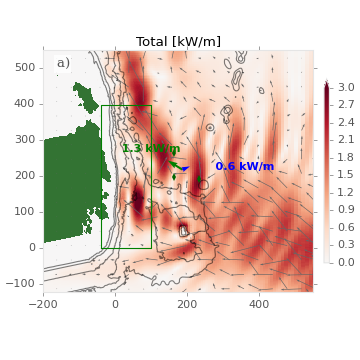

0


In [44]:
import matplotlib as mp
phatoff=0.
saveplot=1.
zoom=0
moors=1
dec=1
phatoff=np.pi*0.
#djmkfigure(2,0.4)
fig,axs=plt.subplots(1,1,figsize=(6*3./4.,6*3./4.))
fig.subplots_adjust(right=0.82,left=0.15)
fig.subplots_adjust(wspace=0.02,hspace=0.13,right=0.87,top=0.95,left=0.12,bottom=0.1)


titl=['Total [kW/m]']
aa=1./sqrt(2.)
aa=1./2.
for mode in [0]:
    print mode
    if mode==0:
        fluxn=1.
    else:
        fluxn=4.
    
    # get energy budget:
    aa=1./2.
    Psum = zeros((11,5))
    for modee in range(10):
        Pi,Pr,Pc,Pt = getReflect(In,To,modee)

        for ind,pp in enumerate([Pi,Pr,Pc,Pt]):
            inx = where((x>0.) & (x<80.))[0]
            iny = where((y>0.) & (y<400.))[0]
            uP=real(pp);vP=imag(pp)
            Psum[modee,ind+1]= -sum(uP[iny,inx[-1]]*diff(y)[iny]) \
                    +0.*sum(uP[iny,inx[0]]*diff(y)[iny])  \
                    -sum(vP[iny[-1],inx]*diff(x)[inx])\
                    +sum(vP[iny[0],inx]*diff(x)[inx])
            Psum[modee,0]=mode+1
    Psum[modee+1,:]=sum(Psum,axis=0)

    Pi,Pr,Pc,Pt = getReflect(In,To,mode)
    
    for ind,pp in enumerate([Pt]):
        ax=axs
        #plotFlux()
        pcm1=ax.pcolormesh(x,y,abs(pp),cmap=cmap2,rasterized=True)
        pcm1.set_clim(array([-0.,1.])*3./(mode+1)**2/fluxn)
        ax.set_aspect(1.)
        plotdepthcont(ax,x,y,H)
        ax.set_ylim([-120,550.])
        ax.set_xlim([-150.,550.])
        if zoom:
            ax.set_ylim([-30,450.])
            ax.set_xlim([-30.,250.])
        
        xg = np.arange(np.min(x),np.max(x),40.)
        yg = np.arange(np.min(y),np.max(y),40.)
        if zoom:
            xg = np.arange(np.min(x),np.max(x),20.)
            yg = np.arange(np.min(y),np.max(y),20.)
    
        X,Y=np.meshgrid(xg,yg)
        # get Pug and Pvg
        Pug=0.*X
        Pvg=0.*Y
        for j in range(size(yg)):
            indy = where(y>yg[j])[0][0]
            aa=np.interp(xg,x,real(pp[indy,:]))
            Pug[j,:]=aa
            Pvg[j,:]=np.interp(xg,x,imag(pp[indy,:]))

        
        if moors:
#            plotMoor(ax)
            ax.plot(xmoor[[1,2,3]],ymoor[[1,2,3]],'d',color='darkgreen',markersize=5,markeredgecolor='None')
            ax.quiver(X,Y,Pug,Pvg,scale=20./(mode+1)**2/fluxn,color='0.4',edgecolor=[])
            F1 = np.abs(Fu1+1j*Fv1)
            F2 = np.abs(Fu2+1j*Fv2)
            
            ax.quiver(mean(xx)/1000.,np.mean(yy)/1000.,Fu1,Fv1,scale=20./(mode+1)**2/fluxn,color='g',edgecolor=[])
            ax.text(np.mean(xx)/1000.-200,np.mean(yy)/1000.+50.,'   %1.1f kW/m'%F1,color='green',fontweight='bold')
            ax.quiver(mean(xx)/1000.,np.mean(yy)/1000.,Fu2,Fv2,scale=20./(mode+1)**2/fluxn,color='blue',edgecolor=[])
            ax.text(np.mean(xx)/1000.+50,np.mean(yy)/1000.,'\n    %1.1f kW/m'%F2,color='blue',fontweight='bold')

        if (ind==0)|(ind==2):
            ax.set_ylabel('Y [km]')
        else:
            ax.set_yticklabels('')
            ax.set_xlabel('X [km]')
       
        ax.set_xticks(arange(-200.,600.,200.))
        ax.set_title(titl[ind],fontsize=12)
        ax.text(0.05,1.-0.07,'%c) '%(chr(ord('a')+ind)),
                    fontsize=12,transform = ax.transAxes,color='#555555',
                    family='serif',
                   bbox=dict(facecolor='w', edgecolor='None',
                            alpha=0.8))
        cell_txt='Mode  [MW]\n'
        
        for mm in range(4):
            cell_txt+='%4d %6.1f\n'%(mm+1,Psum[mm,ind+1])
        cell_txt+=' Tot %6.1f'%Psum[-1,ind+1]
        #ax.text(335,335,cell_txt,fontsize=8,family='monospace',
        #        bbox=dict(facecolor='w', edgecolor='darkgreen',alpha=0.7))
        
        xl = [-40.,100.];yl=[0.,400.]
        plotBox(ax,x,y,xl,yl)

#    colorbarRight(pcm1,axs,fig,shrink=0.5,extend='max')
    
    colorbarRight(pcm1,axs,fig,extend='max',width=0.015,shrink=0.6,label='F [kW/m]')
    if saveplot:
        jmkprint('TwoWaves','PaperPlots.ipynb')

## Baroclinic to barotropic conversion

<IPython.core.display.Javascript object>


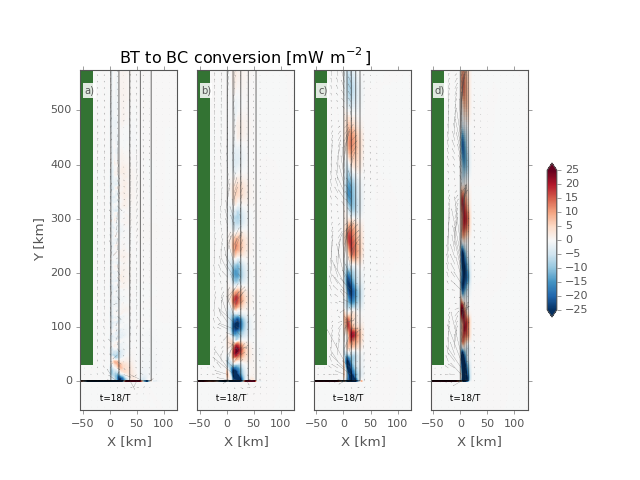

['vEbc', 'uEbc', 'vPbc', 'Conv', 'Ebc', 'uPbc', 'vPbt', 'Ebc0', 'Depth', 'U', 'y', 'x', 'z', 'uPbt']
['vEbc', 'uEbc', 'vPbc', 'Conv', 'Ebc', 'uPbc', 'vPbt', 'Ebc0', 'Depth', 'U', 'y', 'x', 'z', 'uPbt']
['vEbc', 'uEbc', 'vPbc', 'Conv', 'Ebc', 'uPbc', 'vPbt', 'Ebc0', 'Depth', 'U', 'y', 'x', 'z', 'uPbt']
['vEbc', 'uEbc', 'vPbc', 'Conv', 'Ebc', 'uPbc', 'vPbt', 'Ebc0', 'Depth', 'U', 'y', 'x', 'z', 'uPbt']


In [225]:
fig,axs=plt.subplots(1,4,figsize=(8,6))
#axs=axs.reshape((4,4))
fig.subplots_adjust(hspace=0.05,right=0.825)
tit=['Wide Shelf','Narrow Shelf']
for nn,name in enumerate(['Shelf100km','Shelf1km03','Shelf1km04','Shelf020km']):
    for tt,tidecyc in enumerate([18]):
        ax=axs[nn]
        #tidecyc=6
        D=hdf5storage.loadmat('Tas3d/%s/Diags%04d.mat'%(name,tidecyc*360)) 
        x=D['x']/1.e3;y=D['y']/1.e3
        kernel=np.ones((4,4))/16.
        C = convolve2d(D['Conv']*1.e6,kernel,mode='same')
        
        
        print D.keys()
        pcm=ax.pcolormesh(x,y,C,rasterized=True,cmap=cm.RdBu_r)
        pcm.set_clim(np.array([-1.,1.])*0.025*1000.)
        ## arrows
        xg = np.arange(np.min(x),np.max(x),12.)
        yg = np.arange(np.min(y),np.max(y),12.)    
        X,Y=np.meshgrid(xg,yg)
        # get Pug and Pvg
        Pug=0.*X
        Pvg=0.*Y
        for j in range(size(yg)):
            indy = where(y>yg[j])[0][0]
            aa=np.interp(xg,x,D['uPbt'][indy,:])
            Pug[j,:]=aa*1000.
            Pvg[j,:]=np.interp(xg,x,D['vPbt'][indy,:])*1000.
        ax.quiver(X,Y,Pug,Pvg,scale=2000.,color='0.4',edgecolor=[])
        
        plotdepthcont(ax,x,y,D['Depth'])
        ax.set_xticks(np.arange(-100,300,50.))
        ax.set_xlim([-55,125.])
        ax.set_ylim([-54,575.])
        ax.set_aspect(1.)
        ax.set_xlabel('X [km]')
            
        if nn>0:
            ax.set_yticklabels('')
        else:
            ax.set_ylabel('Y [km]')
        ax.text(-30,-35,'  t=%d/T'%tidecyc,fontsize=8)
colorbarRight(pcm,axs,fig,extend='both',shrink=0.4,width=0.015)
axs[1].set_title('BT to BC conversion $[mW\, m^{-2}]$')
sublabel(axs)
if 1:
    jmkprint('ShelfWidthBTBC','PaperPlots.ipynb')
    

<IPython.core.display.Javascript object>


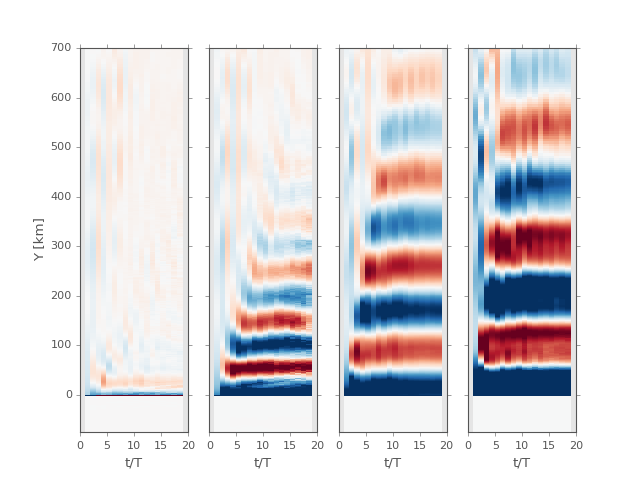

In [223]:
# make a Hovmoeller diagram:
C = np.zeros((len(y),19))
name = 'Shelf020km'
fig,axs=plt.subplots(1,4,sharex=True,sharey=True)
for nn,name in enumerate(['Shelf100km','Shelf1km03','Shelf1km04','Shelf020km']):
    ax=axs[nn]
    for tidecyc in range(1,20):
        D=hdf5storage.loadmat('Tas3d/%s/Diags%04d.mat'%(name,(tidecyc)*360)) 
        x=D['x']/1.e3;y=D['y']/1.e3
        indy = where(y>100.)[0][0]

        indx = where(D['Depth'][indy,:]>1500.)[0][0]
        C[:,tidecyc-1]=D['Conv'][:,indx]
    pcm=ax.pcolormesh(time,y,C*1.e6,cmap=cm.RdBu_r)
    pcm.set_clim(np.array([-1.,1.])*0.025*1000.)
    ax.set_ylim([-75,700])
    ax.set_xlabel('t/T')
    if nn==0:
        ax.set_ylabel('Y [km]')
    
if 1:
    jmkprint('HovemoellerConv','PaperPlots.ipynb')

[[ -1.28635005e-06  -1.28635006e-06  -1.28635006e-06 ...,  -1.28635005e-06
   -1.28635006e-06  -1.28635005e-06]
 [ -5.14062250e-10   4.64434479e-11  -7.18492105e-11 ...,  -2.78779360e-11
   -2.36911078e-11  -2.68834375e-11]
 [ -3.89520249e-10   5.08473090e-11   1.00440494e-10 ...,  -9.43488734e-12
   -5.72689942e-12  -8.29561134e-12]
 ..., 
 [  2.46890927e-06   3.83523427e-06   1.12966823e-05 ...,  -2.44378092e-07
   -6.30035686e-07  -1.27927745e-07]
 [  7.01358415e-06   1.28343925e-05   3.37263334e-05 ...,   6.68039401e-08
   -5.30138866e-07  -9.97522742e-08]
 [ -9.65044048e-26  -9.65044048e-26  -9.65044048e-26 ...,  -9.65044048e-26
   -9.65044048e-26  -9.65044048e-26]]


<IPython.core.display.Javascript object>


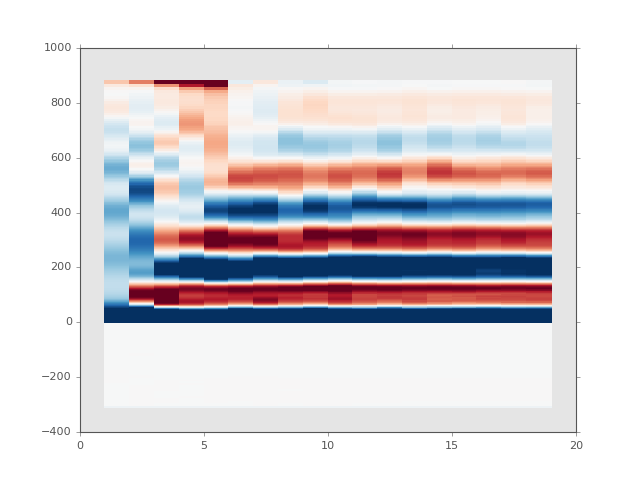

AttributeError: 'QuadMesh' object has no attribute 'hold'

In [215]:
print C
time = np.arange(1,20)
fig,ax=plt.subplots()
pcm=ax.pcolormesh(time,y,C*1.e6,cmap=cm.RdBu_r)
pcm.set_clim(np.array([-1.,1.])*0.025*1000.)
fig.colorbar(ax,pcm)